# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [10]:
import MeCab

def parse():
    mecab = MeCab.Tagger()
    text = open('neko.txt').read()
    return mecab.parse(text)

with open('neko.txt.mecab', 'w') as f:
    f.write(parse())

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
def mecab_result_reader():
    sentence = []
    with open('neko.txt.mecab') as f:
        for line in f:
            line = line.rstrip()
            if line == 'EOS':
                if len(sentence) > 0:
                    yield sentence
                raise StopIteration
            surface, others = line.split('\t')
            others = others.split(',')
            sentence.append({'surface': surface, 'base': others[6], 'pos': others[0], 'pos1': others[1]})
            if surface == '。':
                yield sentence
                sentence = []

# 最初の3個のみ表示
for i, s in enumerate(mecab_result_reader()):
    if i > 2:
        break
    print(s)
    print('\n')

[{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'}, {'surface': '\u3000', 'pos': '記号', 'pos1': '空白', 'base': '\u3000'}, {'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'}, {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'}, {'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'}, {'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'}, {'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'}, {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}]


[{'surface': '名前', 'pos': '名詞', 'pos1': '一般', 'base': '名前'}, {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'}, {'surface': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'base': 'まだ'}, {'surface': '無い', 'pos': '形容詞', 'pos1': '自立', 'base': '無い'}, {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}]


[{'surface': '\u3000', 'pos': '記号', 'pos1': '空白', 'base': '\u3000'}, {'surface': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'base': 'どこ'}, {'surface': 'で', 'pos': '助詞', 'pos1': '格助詞', 'base': 'で'}, {'surface': '生れ', 'pos': 

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [82]:
# 最初の10個のみ表示
total = 0
for i, s in enumerate(mecab_result_reader()):
    if total >= 10:
        break
    for t in s:
        if total >= 10:
            break
        if t['pos'] == '動詞':
            print(t['surface'])
            total += 1

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [79]:
# 最初の10個のみ表示
total = 0
for i, s in enumerate(mecab_result_reader()):
    if total >= 10:
        break
    for t in s:
        if t['pos'] == '動詞':
            print(t['base'])
            total += 1

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [78]:
# 最初の10個のみ表示
total = 0
for i, s in enumerate(mecab_result_reader()):
    if total >= 10:
        break
    for t in s:
        if t['pos'] == '名詞' and t['pos1'] == 'サ変接続':
            print(t['surface'])
            total += 1

見当
記憶
話
装飾
突起
運転
記憶
分別
決心
我慢


## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [103]:
# 最初の10個のみ表示
total = 0
for s in mecab_result_reader():
    if total >= 10:
        break
    indexes = [i for i, t in enumerate(s) if t['surface'] == 'の']
    for idx in indexes:
        if idx == 0 | idx == len(s) - 1:
            break
        if s[idx-1]['pos'] == '名詞' and s[idx+1]['pos'] == '名詞':
            print(s[idx-1]['surface'] + s[idx]['surface'] + s[idx+1]['surface'])
            total += 1

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [104]:
# 最初の10個のみ表示
total = 0
for s in mecab_result_reader():
    if total >= 10:
        break
    nouns = []
    for t in s:
        if t['pos'] == '名詞':
            nouns.append(t['surface'])
        else:
            if len(nouns) >=2:
                print(''.join(nouns))
                total += 1
            nouns = []    

人間中
一番獰悪
時妙
一毛
その後猫
ぷうぷうと煙
邸内
三毛
書生以外
四五遍


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [107]:
dic = {}
for s in mecab_result_reader():
    for t in s:
        w = t['surface']
        if w in dic:
            dic[w] += 1
        else:
            dic[w] = 1
# 最初の10個のみ表示
sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

[('の', 9195),
 ('。', 7486),
 ('て', 6873),
 ('、', 6772),
 ('は', 6422),
 ('に', 6270),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989)]

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family': 'IPAexGothic'}
plt.rc('font', **font)
plt.rc('figure', figsize=(12, 8))

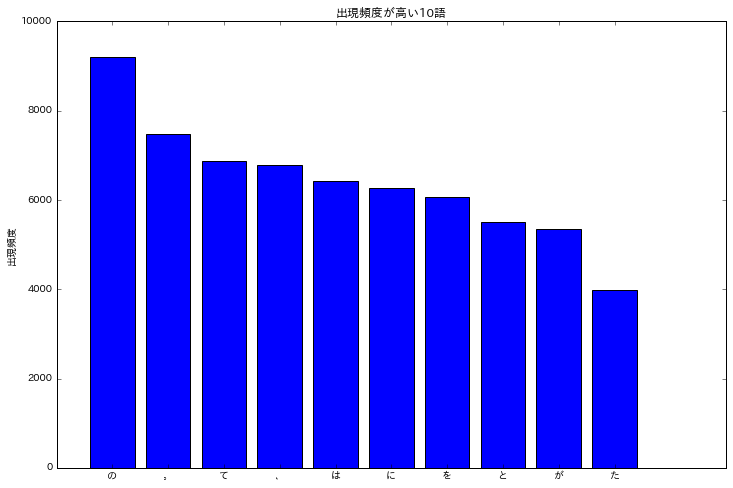

In [145]:
dic = {}
for s in mecab_result_reader():
    for t in s:
        w = t['surface']
        if w in dic:
            dic[w] += 1
        else:
            dic[w] = 1
top10 = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

label = [wc[0] for wc in top10]
height = [wc[1] for wc in top10]
left = list(range(1, 11))

plt.bar(left=left, height=height, align="center")
plt.title('出現頻度が高い10語')
plt.ylabel('出現頻度')
_ = plt.xticks (left, label)

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

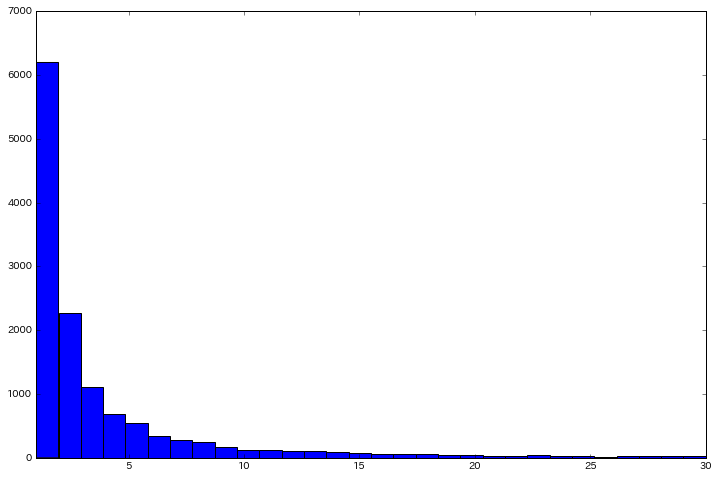

In [147]:
dic = {}
for s in mecab_result_reader():
    for t in s:
        w = t['surface']
        if w in dic:
            dic[w] += 1
        else:
            dic[w] = 1

freqs = list(dic.values())
plt.hist(freqs, bins=30, range=(1,30))
_ = plt.xlim(1, 30)

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

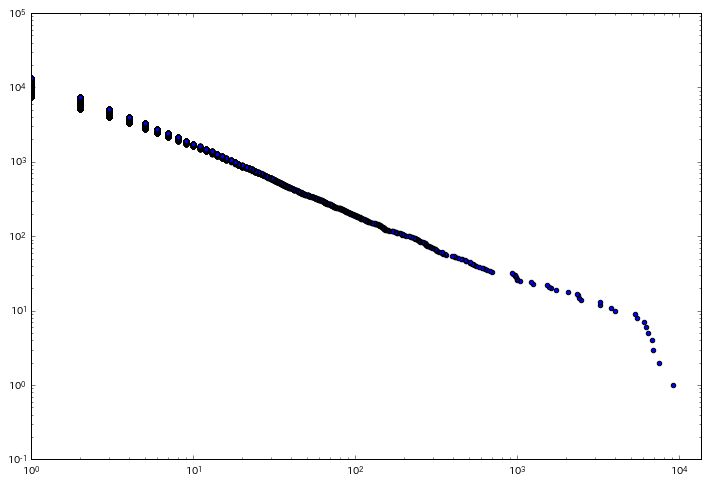

In [149]:
dic = {}
for s in mecab_result_reader():
    for t in s:
        w = t['surface']
        if w in dic:
            dic[w] += 1
        else:
            dic[w] = 1
freqs = [t[1] for t in sorted(dic.items(), key=lambda x: x[1], reverse=True)]
plt.scatter(freqs, list(range(1,len(freqs)+1)))
plt.xlim(1, len(freqs)+1)
plt.xscale('log')
plt.yscale('log')